In [1]:
import pandas as pd
import numpy as np

In [131]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [132]:
train_null_data = dict(train_data.isnull().sum())

In [133]:
miss = train_data.isnull().sum()/len(train_data)

miss = miss[miss > 0]

miss.sort_values(inplace  = True)

miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [134]:
miss = miss.to_frame()

miss.columns = ['count']

miss.index.names = ['Names']

miss

,count
Names,
Electrical,0.000685
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342
BsmtExposure,0.026027
BsmtFinType2,0.026027
GarageCond,0.055479


In [135]:
miss["Names"] = miss.index

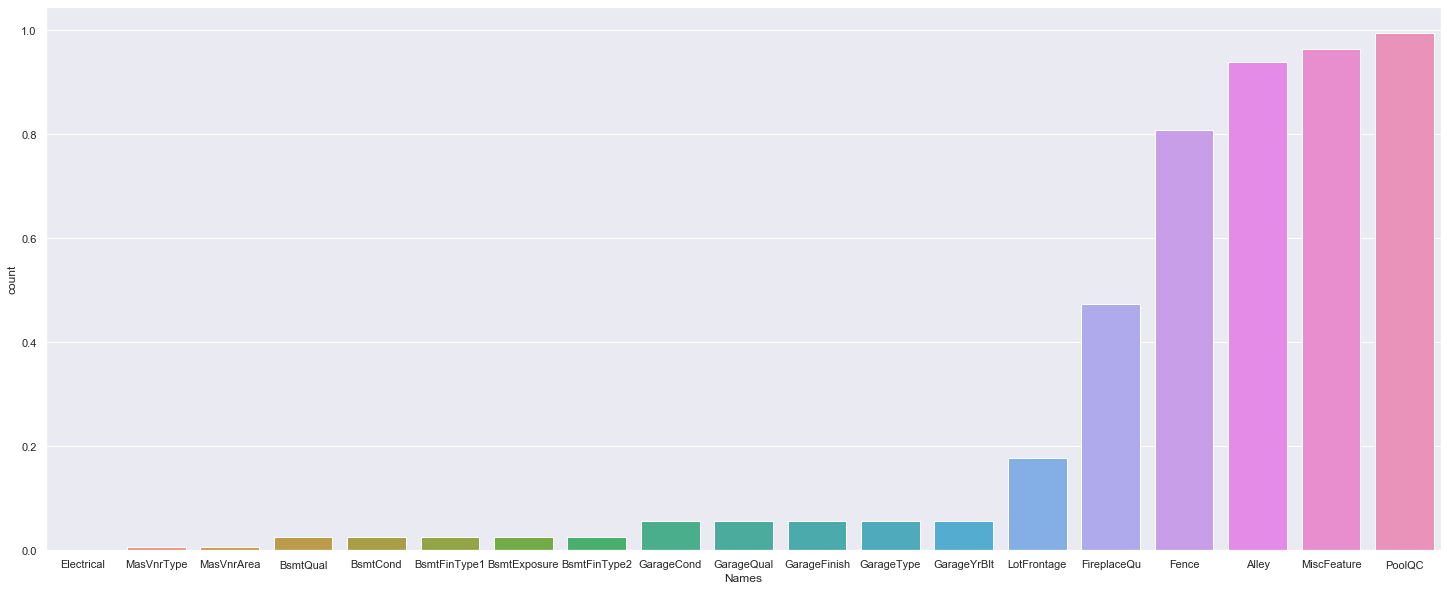

In [136]:
import seaborn as sns

sns.set(style = "darkgrid", color_codes = True, rc={'figure.figsize':(25,10)})

sns.barplot(x = "Names", y = "count", data = miss)

# sns.plt.show()

In [113]:
train_data = train_data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1)

In [114]:
test_data = test_data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis = 1)

In [137]:
miss = train_data.isnull().sum()/len(train_data)

miss = miss[miss > 0]

miss.sort_values(inplace  = True)

miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [138]:
miss_dict = dict(miss)

In [139]:
for x in list(miss_dict.keys()):
    if train_data[x].dtype == 'object':
        train_data[x] = train_data[x].fillna(list(dict(train_data[x].value_counts()).keys())[0])
    else:
        train_data[x] = train_data[x].fillna(train_data[x].mean())

In [140]:
miss = test_data.isnull().sum()/len(test_data)

miss = miss[miss > 0]

miss

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

In [141]:
miss_dict = dict(miss)

In [142]:
for x in list(miss_dict.keys()):
    if test_data[x].dtype == 'object':
        test_data[x] = test_data[x].fillna(list(dict(test_data[x].value_counts()).keys())[0])
    else:
        test_data[x] = test_data[x].fillna(test_data[x].mean())

In [143]:
from sklearn import preprocessing

for x in train_data.columns:
    if train_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(train_data[x].values)
        train_data[x] = lbl.transform(train_data[x].values)

In [144]:
for x in test_data.columns:
    if test_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(test_data[x].values)
        test_data[x] = lbl.transform(test_data[x].values)

In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data.drop(["Id", "SalePrice"], axis = 1), train_data["SalePrice"])

In [156]:
from xgboost import XGBRegressor

clf = XGBRegressor(n_estimators=500, max_depth=15)

In [157]:
clf.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [161]:
from sklearn.metrics import mean_absolute_error

predictions = clf.predict(x_test)

print(mean_absolute_error(np.array(y_test), predictions))

18077.30727739726


In [198]:
predictions_final = clf.predict(test_data.drop("Id", axis = 1))

In [201]:
index = [x for x in range(1461, 1461 + len(predictions_final))]

In [204]:
final_df = pd.DataFrame({"Id": index, "SalePrice": predictions_final})

In [206]:
final_df.to_csv("sample_submission.csv", index=False)